In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sqlite3
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.patches as mpatches

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Wikipedia

In [2]:
# connect to wikipedia db and create df
conn = sqlite3.connect('./pre_processed_data/lab2.db')
df_wik = pd.read_sql("""SELECT * from wiki_artists
""", conn)
conn.close()
df_wik.rename(columns={'name':'artist'}, inplace=True)
print(df_wik.shape)
df_wik.head()

(10487, 3)


,artist,country,lineage
0,kim jin-ho,South Korean,Asian
1,solar,South Korean,Asian
2,cool,South Korean,Asian
3,golden child,South Korean,Asian
4,kim so-hye,South Korean,Asian


# Billboard

In [3]:
# connect to billboard db
conn = sqlite3.connect('./pre_processed_data/lab2.db')
my_sql = """
    SELECT *
    FROM billboard
    left join wiki_artists
    on name = artist 
"""
df_bb = pd.read_sql(my_sql, conn)
df_bb['date'] = pd.to_datetime(df_bb['date'])

# create df for billboard global 200
cols = ['date', 'artist', 'rank', 'country', 'lineage']
df_bbg200 = df_bb[df_bb['chartname']=='weekly_billboard_global_200']
df_bbg200 = df_bbg200[cols]
df_bbg200 = df_bbg200.fillna({'country':'Non-Asian','lineage': 'Non-Asian'})

# create df for top ranking
df_tops = df_bbg200[df_bbg200['rank']==1]

# export csv
df_tops.to_csv('./post_processed_data/df_bbg200_timeline.csv', index=False)

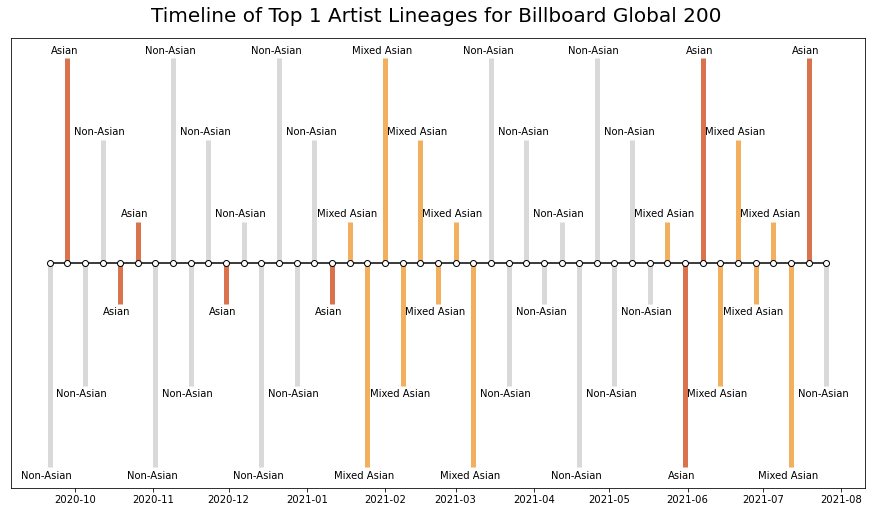

In [4]:
# plot timeline for billboard global 200
df_tops = pd.read_csv('./post_processed_data/df_bbg200_timeline.csv')
df_tops['date'] = pd.to_datetime(df_tops['date'])
dates = df_tops['date'].to_list()
names = df_tops['lineage'].to_list()
colors = []
for n in names:
    if n == 'Asian':
        colors.append('#D9734E')
    elif n == 'Mixed Asian':
        colors.append('#F2B05E')
    else:
        colors.append('#D9D9D9')
        
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

fig, ax = plt.subplots(figsize=(12, 7), constrained_layout=True)
fig.suptitle('Timeline of Top 1 Artist Lineages for Billboard Global 200', fontsize=20)
ax.vlines(dates, 0, levels, color=colors, linewidth=5)
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")

for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top")

ax.yaxis.set_visible(False)